# GROUPE 4  CEDRIC -SERGE MARUCHCA  prenoms_usa_

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = pd.read_csv('data/names/yob1880.txt', names=['name', 'sex', 'birth'])

# 1. Nb de naissances
grouped = names.groupby('sex')['birth']

print(grouped.sum())

# 2. Concat yobs files
columns = ['name', 'sex', 'birth']
yobs = []

# 3 Script permettant d'agréger les données
for year in range(1880, 2019):
    path = f"data/names/yob{year}.txt"
    df = pd.read_csv(path, names=columns)
    df['year'] = year
    yobs.append(df)

names = pd.concat(yobs, ignore_index=True)
names.head()

sex
F     90994
M    110490
Name: birth, dtype: int64


,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [119]:
# 4 table de piveau
total_births = names.pivot_table(values='birth', index='year', columns='sex', aggfunc=sum)

total_births.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [120]:
# Comparaison avec la méthode groupby
names.groupby(['year', 'sex']).sum()
names.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


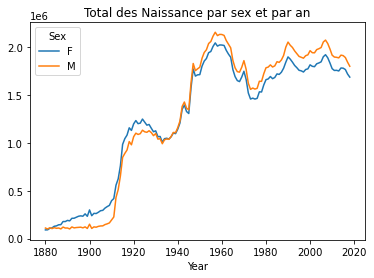

In [121]:
# 5. Représentation graphique 

total_births.plot(title="Total des Naissance par sex et par an")
plt.xlabel("Year")
plt.legend(title="Sex");

In [122]:
def get_counts(group):
    births = group.birth.astype(float)
    group['prop'] = births / births.sum()
    
    return group

names = names.groupby(['year', 'sex']).apply(get_counts)

In [123]:
names.head()

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [124]:
# 7 Vérification 
np.allclose( names.groupby(['year', 'sex']).prop.sum(), 1 )

True

In [149]:
# 8 Sous-ensemble de 1000 prénoms

# On déjà regroupé

def get_top1000(group):
        return group.sort_values(by=['birth'], ascending=False)[:1000]
    
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.drop(columns=['year', 'sex'], inplace=True)
top1000.head()

name  birth      prop
year sex                              
1880 F   0       Mary   7065  0.077642
         1       Anna   2604  0.028617
         2       Emma   2003  0.022012
         3  Elizabeth   1939  0.021309
         4     Minnie   1746  0.019188